# How to predict the second hand car price using Machine learning 

In this project, we’ll build a predictive model to predict the second hand car price. We will prepare the data using Jupyter 
Notebook and use Linear regression models to predict the target variable (price of the car).we use linear regression because our data is in a contineous form.  

#Table of Contents

1 Getting the system ready and loading the data 
2 Understanding the data
3 Exploratory Data Analysis (EDA)
4 Check the DataType of all columns
5 Remove some Record that are not in proper formate
6 Change the data Type of Columns(in Object to int)
7 Remove null value from the Columns
8 Evaluation Metrics for Regression problems
9 Create Linear Regression model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now, we load csv file into our dataset(cars_df)

In [3]:
cars_df=pd.read_csv("C:/Users/archa/car price prediction/car_data.csv")

In [4]:
cars_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
cars_df.shape

(892, 6)

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


now, we should check our data is in correct formate or not
Year column : data should be numeric type but in this case data is any formate.

In [8]:
cars_df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In kms_driven column, we have some nan-value ,so we should remove it.
and we also need data in numerical form , so we need to remove "kms" word from each data record

In [9]:
cars_df["kms_driven"].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In fuel_type column we have some nan value ,so we should remove it.

In [10]:
cars_df["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [11]:
cars_df["fuel_type"].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

In [12]:
cars_df["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

# cleaning

In [13]:
backup=cars_df.copy()

In [14]:
cars_df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

check where is only numeric values in our year column and only those values are taken into our dataset.

In [15]:
cars_df=cars_df[cars_df['year'].str.isnumeric()]

In [16]:
cars_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [17]:
cars_df['year'].astype(int)

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    object
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 46.0+ KB


now, we should change year column's data type(object to int)

In [19]:
cars_df['year']=cars_df['year'].astype(int)

In [20]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


in price column, we can see there is one string values("Ask For Price")

In [21]:
cars_df['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

we need only integer value from price column so, so we can take all the record excluding "Ask For Price"

In [22]:
cars_df=cars_df[cars_df['Price']!="Ask For Price"]

In [23]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    object
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.6+ KB


now we will remove "," from Price (ex:8,45,000) and change the data type object to integer

In [24]:
cars_df["Price"]=cars_df["Price"].str.replace(",","").astype(int)

<ipython-input-24-2b23f7b71126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df["Price"]=cars_df["Price"].str.replace(",","").astype(int)


In [25]:
cars_df["Price"]

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [26]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [27]:
cars_df["kms_driven"]

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

in kms_driven colums we will split the value then it will look like this([45,000 , kms])
so we get first value using index[0] then we will remove the (45,000 to 45000)

In [28]:
cars_df['kms_driven']=cars_df['kms_driven'].str.split(" ").str.get(0).str.replace(",","")

<ipython-input-28-ee8b04446675>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['kms_driven']=cars_df['kms_driven'].str.split(" ").str.get(0).str.replace(",","")


In [29]:
cars_df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

We can see in kms_driven column have some string value(petrol) so we need to take only those value that are in a numeric formate

In [30]:
cars_df=cars_df[cars_df['kms_driven'].str.isnumeric()]

now, we need to change data type of kms_driven column (object to int)

In [31]:
cars_df['kms_driven']=cars_df['kms_driven'].astype(int)

In [32]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [33]:
cars_df=cars_df[~cars_df['fuel_type'].isna()]

In [34]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [35]:
backup['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
2                  Maruti Suzuki Alto 800 Vxi
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
                        ...                  
887                                        Ta
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
890                  Honda Amaze 1.2 E i VTEC
891                 Chevrolet Sail 1.2 LT ABS
Name: name, Length: 892, dtype: object

In [36]:
#how to work Split Method
a="mango apple banana"

In [37]:
a.split(" ")

['mango', 'apple', 'banana']

in our name column we have too much unwanted data , so we will take first 3 word, so we need to apply split method   

In [38]:
cars_df['name']=cars_df['name'].str.split(" ").str.slice(0,3).str.join(" ")

In [39]:
cars_df.index

Int64Index([  0,   1,   3,   4,   6,   7,   8,   9,  10,  11,
            ...
            877, 878, 879, 880, 881, 883, 885, 886, 888, 889],
           dtype='int64', length=816)

now,we remove all the nan value, so we need to reset our index ,but when we apply reset_index() method our dataset also contain  previous index

In [40]:
cars_df.reset_index()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [41]:
cars_df=cars_df.reset_index(drop=True)

In [42]:
cars_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [43]:
cars_df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [44]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#cars_df['name1']= label_encoder.fit_transform(cars_df['name'])
#cars_df['company1']= label_encoder.fit_transform(cars_df['company'])
#cars_df['fuel_type1']= label_encoder.fit_transform(cars_df['fuel_type'])

In [45]:
cars_df.corr()

,year,Price,kms_driven
year,1.000000,0.287193,-0.233695
Price,0.287193,1.000000,-0.120854
kms_driven,-0.233695,-0.120854,1.000000


In [46]:
cars_df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [47]:
cars_df["Price"].max()

8500003

In [48]:
cars_df=cars_df[cars_df["Price"]<=6000000]

In [49]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.0+ KB


In [50]:
cars_df.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


now,we need to save all our work, so we will dump our data into a csv file

In [51]:
cars_df.to_csv("C:/Users/archa/car price prediction/Cleaned car.csv")

In [52]:
cars_df.corr()

,year,Price,kms_driven
year,1.000000,0.347764,-0.233699
Price,0.347764,1.000000,-0.149621
kms_driven,-0.233699,-0.149621,1.000000


Now we analyse our data in ghraphical format

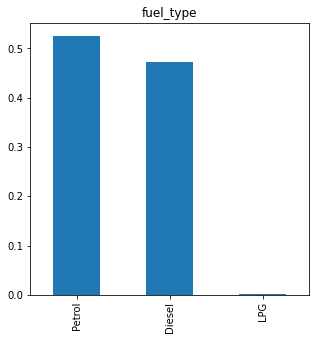

In [56]:
cars_df['fuel_type'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='fuel_type')
plt.show()

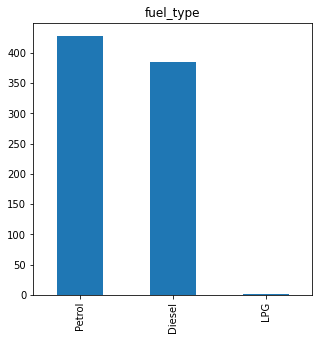

In [90]:
cars_df['fuel_type'].value_counts().plot.bar(figsize=(5,5), title='fuel_type')
plt.show()

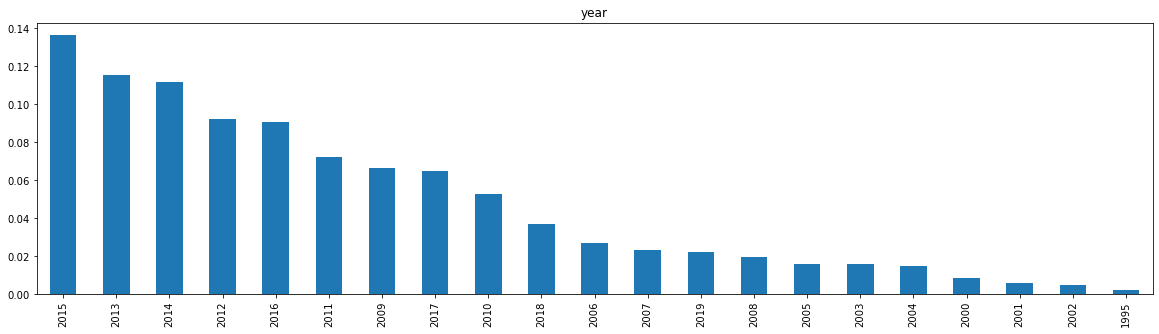

In [73]:
cars_df['year'].value_counts(normalize=True).plot.bar(figsize=(20,5), title='year')
plt.show()

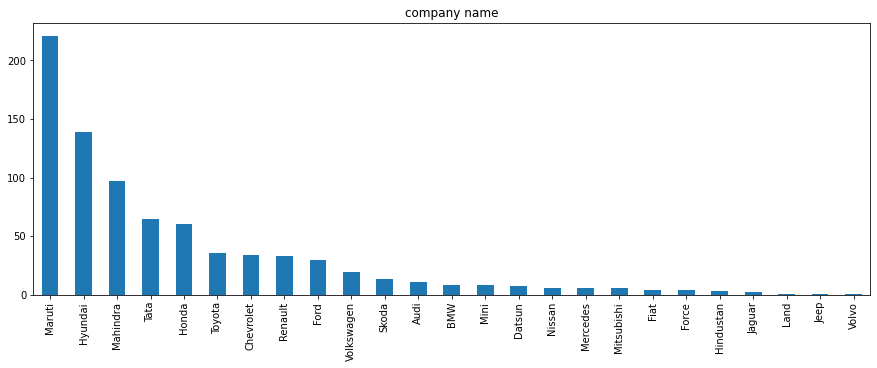

In [88]:
cars_df['company'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='company name')
plt.show()

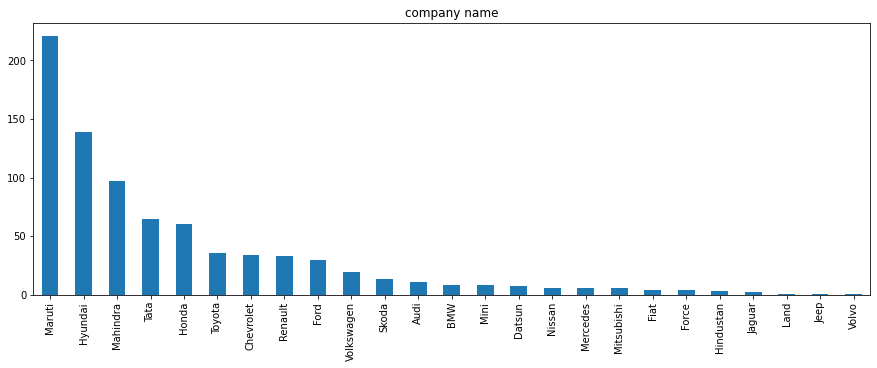

In [89]:
cars_df['company'].value_counts().plot.bar(figsize=(15,5), title='company name')
plt.show()

In [131]:
cars_df.corr()

,year,Price,kms_driven
year,1.000000,0.347764,-0.233699
Price,0.347764,1.000000,-0.149621
kms_driven,-0.233699,-0.149621,1.000000


In [91]:
cars_df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [133]:
#grp_f_c = cars_df.groupby(['fuel_type', 'company'])
#grp_f_c.first()
grp_f_c = cars_df.groupby(['fuel_type','company']).count()

In [134]:
ndf=grp_f_c

In [135]:
ndf.columns

Index(['name', 'year', 'Price', 'kms_driven'], dtype='object')

In [136]:
type(grp_f_c)

pandas.core.frame.DataFrame

In [127]:
grp_f_c

name  year  Price  kms_driven
fuel_type company                                  
Diesel    Audi           7     7      7           7
          BMW            5     5      5           5
          Chevrolet     21    21     21          21
          Fiat           1     1      1           1
          Force          4     4      4           4
          Ford          19    19     19          19
          Hindustan      2     2      2           2
          Honda         15    15     15          15
          Hyundai       27    27     27          27
          Jaguar         1     1      1           1
          Jeep           1     1      1           1
          Land           1     1      1           1
          Mahindra      94    94     94          94
          Maruti        60    60     60          60
          Mercedes       2     2      2           2
          Mitsubishi     4     4      4           4
          Nissan         3     3      3           3
          Renault       25    25     25          25
          Skoda          9     9      9           9
          Tata          50    50     50          50
          Toyota        20    20     20          20
          Volkswagen    13    13     13          13
          Volvo          1     1      1           1
LPG       Maruti         2     2      2           2
Petrol    Audi           4     4      4           4
          BMW            3     3      3           3
          Chevrolet     13    13     13          13
          Datsun         7     7      7           7
          Fiat           3     3      3           3
          Ford          11    11     11          11
          Hindustan      1     1      1           1
          Honda         45    45     45          45
          Hyundai      112   112    112         112
          Jaguar         1     1      1           1
          Mahindra       3     3      3           3
          Maruti       159   159    159         159
          Mercedes       4     4      4           4
          Mini           8     8      8           8
          Mitsubishi     2     2      2           2
          Nissan         3     3      3           3
          Renault        8     8      8           8
          Skoda          4     4      4           4
          Tata          15    15     15          15
          Toyota        16    16     16          16
          Volkswagen     6     6      6           6

# Create the Model

In [58]:
x= cars_df.drop(columns='Price')
y=cars_df['Price']

In [59]:
x.columns

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')

In [60]:
#x=cars_df[['year', 'kms_driven', 'name1',
#       'company1', 'fuel_type1']]

In [61]:
x.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

ordinal encoding: In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called an ordinal encoding or an integer encoding and is easily reversible. 

one-hot encoding: a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on.” This is called one-hot encoding …

In [64]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])


OneHotEncoder()

In [65]:
#it show all tha categories in our dataset(in array formate)
ohe.categories_ 

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [66]:
#when x_test has some different data that are not present in x_train, on that time pipe will through error msg
#for avoiding these kind of error we pass this:OneHotEncoder(categories=ohe.categories_)
columns_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']), remainder="passthrough")


In [67]:
columns_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petro

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.   

In [101]:
lr=LinearRegression()  

In [102]:
#we can pass any row data,this function will first applying onehotencoder and then predict the output  
model=make_pipeline(columns_trans,lr)

In [103]:
model.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [104]:
y_pred=model.predict(x_test)

In [244]:
y_pred

array([ -39442.81131644,  294667.27097654,  121803.58033088,
        537216.20623612,  194608.49015445,  302366.54775515,
        457468.88695881,  223010.54562104,  597115.97983405,
        113659.05646784,  396316.60387965,  213610.56462907,
        242141.61342755,  219322.87435507,  605124.83132927,
        315160.59105216,  588971.28084145,  539969.34778127,
        345374.00912816,  251161.85292733,  454115.77343779,
        101300.7807251 ,  212364.26006492,  139617.28441419,
        214733.9005606 ,  239340.54360058,  144710.49929721,
       1505041.07131245,  615784.18331321,  560095.23671731,
        403847.26211386,  -22483.35379642,  276012.81658307,
       1394526.95044465,  153578.14867542,  389612.81205801,
        265690.52884451,  765820.04330599,  214692.9809005 ,
        157958.71658577,  342332.66977793,  116572.61139508,
        233322.14895418,  317980.92912684,  236517.1298858 ,
        182887.3207348 ,  236689.56772932,  605350.4936673 ,
        450907.39126839,

In [105]:
r2_score(y_test,y_pred)

0.6107647841570307

In [106]:
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model=make_pipeline(columns_trans,lr)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(r2_score(y_test,y_pred),i)

0.762600955916067 0
0.5604901706685078 1
0.8032656589712205 2
0.6812967388686224 3
0.7566845129346844 4
0.5901203440120129 5
0.5861722667585405 6
0.540643576812933 7
0.7704828120451989 8
0.7858701096205659 9


In [107]:
score=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    model=make_pipeline(columns_trans,lr)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #printqw=(r2_score(y_test,y_pred),i)
    result=(r2_score(y_test,y_pred))
    score.append(result)

In [258]:
score

[(0.7851438430969959, 0),
 (0.5133135805637714, 1),
 (0.6892790625522022, 2),
 (0.5995083318337382, 3),
 (0.8538671282398225, 4),
 (0.7471859950146672, 5),
 (0.6257427936663227, 6),
 (0.685966146007482, 7),
 (0.7645992182097278, 8),
 (0.7310605022881699, 9),
 (0.7654819181556001, 10),
 (0.7341361554345014, 11),
 (0.5285812284486553, 12),
 (0.7808598555448028, 13),
 (0.7117438696816341, 14),
 (0.741540321848185, 15),
 (0.5182511538877357, 16),
 (0.7431813542931995, 17),
 (0.6922761092068438, 18),
 (0.6663713233140169, 19),
 (0.6626431366856882, 20),
 (0.6596943200882615, 21),
 (0.7954299194764375, 22),
 (0.6949287005556742, 23),
 (0.6238151712978919, 24),
 (0.5543376410798648, 25),
 (0.7012202821723339, 26),
 (0.8065632592011327, 27),
 (0.820321638333376, 28),
 (0.5885079935645245, 29),
 (0.6062823542865085, 30),
 (0.6545488017490317, 31),
 (0.8021711636173231, 32),
 (0.8199608028409113, 33),
 (0.5838843332521155, 34),
 (0.6876480440365367, 35),
 (0.6410265354738603, 36),
 (0.7366255541

In [108]:
np.argmax(score)

661

In [109]:
score[np.argmax(score)]

0.8897680821375169

In [110]:
model.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2010,80000,'LPG']).reshape(1,5)))

array([223814.89664002])

In [111]:
import pickle

now, we dump all our data(model) into a pickle file

In [ ]:
pickle.dump(model,open("carpricepredictionbyLR.pkl" , 'wb'))